## Accuracy 

| Actual Label | Logistic Regression Prediction | Decision Tree Prediction |
| ------------ | ------------------------------ | ------------------------ |
| 1            | 1                              | 1                        |
| 0            | 1                              | 1                        |
| 0            | 0                              | 0                        |
| 0            | 0                              | 0                        |
| 1            | 1                              | 1                        |
| 1            | 1                              | 1                        |
| 0            | 1                              | 0                        |
| 0            | 0                              | 0                        |
| 0            | 0                              | 0                        |
| 1            | 1                              | 1                        |


> Accuracy is the proportion of correctly classified instances among the total number of instances.

## Accuracy

### Mathematical Definition

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

### In terms of Confusion Matrix

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

In [29]:
import pandas as pd 
import numpy as np

In [46]:
df = pd.read_csv("heart_disease_uci.csv")

In [47]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [48]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='str')

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
df.dtypes

id            int64
age           int64
sex             str
dataset         str
cp              str
trestbps    float64
chol        float64
fbs          object
restecg         str
thalch      float64
exang        object
oldpeak     float64
slope           str
ca          float64
thal            str
num           int64
dtype: object

In [52]:
# Drop ID
df = df.drop('id', axis=1)

In [45]:
df.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [53]:
# Drop highly missing columns
df = df.drop(columns=['ca', 'thal', 'slope'])

In [55]:
# Drop remaining missing rows
df = df.dropna()

In [56]:
df['num'] = (df['num'] > 0).astype(int)

In [57]:
X = df.drop('num', axis=1)
y = df['num']

In [58]:
# One-hot encode
X = pd.get_dummies(X, drop_first=True)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)

In [62]:
dt.fit(X_train , y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [63]:
lr.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [64]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr.predict(X_test_scaled)))

Decision Tree Accuracy: 0.7567567567567568
Logistic Regression Accuracy: 0.8445945945945946


#### Accuracy of Multiclass problem

| Actual Label | Logistic Regression Prediction | Decision Tree Prediction |
| ------------ | ------------------------------ | ------------------------ |
| 0            | 0                              | 0                        |
| 0            | 0                              | 0                        |
| 0            | 0                              | 0                        |
| 2            | 2                              | 2                        |
| 0            | 0                              | 0                        |
| 2            | 2                              | 2                        |
| 0            | 0                              | 0                        |
| 2            | 2                              | 2                        |
| 1            | 1                              | 1                        |
| 1            | 1                              | 1                        |


In [65]:
import numpy as np
import pandas as pd

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [67]:
iris = load_iris()

In [68]:
X = iris.data

In [69]:
y = iris.target

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
import sklearn
print(sklearn.__version__)

1.8.0


In [74]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [75]:
predictions = model.predict(X_test)

In [76]:
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9333333333333333


#### How much should be the accuracy score ? 

There is no fixed "ideal" accuracy value.

The acceptable accuracy depends on:

- The dataset
- The problem type (binary or multiclass)
- Class balance
- Business requirements
- Baseline performance

---

##### 1. Compare with Baseline

First, compute baseline accuracy.

For example:
- If the dataset has 70% class 0,
- A naive model predicting always 0

Baseline Accuracy = 70%

Your model must perform better than this baseline.

---

##### 2. For Balanced Datasets

If classes are balanced:

- 50% accuracy (binary classification) indicates poor performance
- 70% indicates moderate performance
- 80–90% indicates good performance
- 95% and above may be excellent depending on complexity

Example:
The Iris dataset often achieves 95–100% accuracy because the classes are well separated.

---

##### 3. For Imbalanced Datasets

Accuracy can be misleading.

Example:
If 90% of the data belongs to class 0,
a model predicting only class 0 will achieve 90% accuracy.

However, this model has no real predictive power.

In such cases, consider:
- Precision
- Recall
- F1-score
- ROC-AUC

---

##### 4. Multiclass Problems

For K classes:

Random guessing accuracy is approximately 1/K.

Example:
- 3-class problem → baseline ≈ 33%
- 5-class problem → baseline ≈ 20%

A good model should significantly exceed this baseline.

---
A good accuracy score is not defined by reaching 100%.

It is defined by:
- Beating the baseline
- Generalizing well to unseen data
- Performing reliably across all classes
- Aligning with the real-world cost of errors

#### Problems with Accuracy Score

Accuracy is one of the most commonly used evaluation metrics in classification.
However, it has several important limitations.

---

##### 1. Misleading for Imbalanced Datasets

Accuracy does not consider class distribution.

Example:
If 95% of the samples belong to class 0,
a model predicting only class 0 will achieve 95% accuracy.

This model completely fails to detect the minority class,
yet the accuracy appears high.

---

##### 2. Treats All Errors Equally

Accuracy assumes:

Cost(False Positive) = Cost(False Negative)

In many real-world problems, this is not true.

Examples:
- In medical diagnosis, missing a disease (False Negative) is more serious.
- In spam detection, marking real emails as spam (False Positive) is costly.

Accuracy does not capture this difference.

---

##### 3. Ignores Class-wise Performance

Accuracy gives a single global number.

It does not tell:
- Which class is predicted poorly
- Whether minority classes are being ignored
- How precision and recall behave per class

Two models can have the same accuracy but very different behavior.

---

##### 4. Not Suitable for Skewed Multiclass Problems

In multiclass classification,
if one class dominates,
accuracy may mostly reflect performance on that dominant class.

Minor classes may perform badly without significantly affecting accuracy.

---

##### 5. Not Differentiable

Accuracy is based on hard predictions (0 or 1).

It is not smooth or differentiable.
Therefore, it cannot be directly optimized during training.

Instead, models optimize:
- Cross-entropy (log loss)
- Hinge loss
- Other differentiable losses

Accuracy is only used for evaluation.

---

##### Conclusion

Accuracy is simple and intuitive,
but it is not always reliable.

It should be used when:
- Classes are balanced
- Error costs are similar

Otherwise, consider:
- Precision
- Recall
- F1-score
- ROC-AUC
- Confusion matrix analysis

## Confusion Metrix

##### Confusion Matrix

A Confusion Matrix is a table used to evaluate the performance of a classification model.

It shows how many predictions were correct and how many were incorrect,
broken down by each class.

---

##### Binary Classification Confusion Matrix

For two classes (0 and 1):

|               | Predicted 1 | Predicted 0 |
|--------------|------------|------------|
| Actual 1     | True Positive (TP) | False Negative (FN) |
| Actual 0     | False Positive (FP) | True Negative (TN) |

Where:

- True Positive (TP): Model correctly predicted positive class.
- True Negative (TN): Model correctly predicted negative class.
- False Positive (FP): Model predicted positive but actual was negative.
- False Negative (FN): Model predicted negative but actual was positive.

---

##### Accuracy from Confusion Matrix

Accuracy is computed as:

Accuracy = (TP + TN) / (TP + TN + FP + FN)

The confusion matrix is the foundation for computing all classification metrics.

---

##### Precision and Recall from Confusion Matrix

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1-score = 2 × (Precision × Recall) / (Precision + Recall)

---

##### Multiclass Confusion Matrix

For K classes, the confusion matrix becomes a K × K table.

Example (3 classes):

|        | Pred 0 | Pred 1 | Pred 2 |
|--------|--------|--------|--------|
| Act 0  |   a    |   b    |   c    |
| Act 1  |   d    |   e    |   f    |
| Act 2  |   g    |   h    |   i    |

- Diagonal values represent correct predictions.
- Off-diagonal values represent misclassifications.

Accuracy = (Sum of diagonal elements) / (Total samples)

---

##### Why Confusion Matrix Is Important

The confusion matrix provides more detailed insight than accuracy alone.

It helps to:

- Understand which classes are misclassified.
- Detect class imbalance issues.
- Analyze types of errors (False Positives vs False Negatives).
- Compute precision, recall, and F1-score.

It provides a complete picture of model performance.

In [84]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [85]:
iris = load_iris()
X = iris.data
y = iris.target

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [89]:
y_pred = model.predict(X_test)


##### 7. Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [90]:
print("Confusion Matrix:\n")
print(cm)

Confusion Matrix:

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


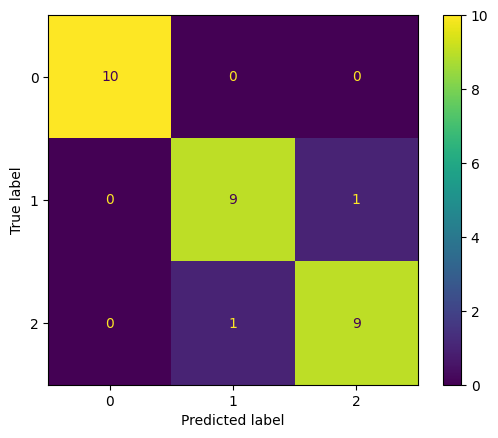

In [91]:
##### 8. Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##### Simple Way to Remember

Positive / Negative → What model predicted  
True / False → Was the prediction correct?

##### Relationship Between Accuracy and Confusion Matrix

You can calculate Accuracy from the Confusion Matrix.

Accuracy = (Sum of diagonal elements) / (Total number of samples)

In binary classification:

Accuracy = (TP + TN) / (TP + TN + FP + FN)

So if you know the confusion matrix,
you can always compute accuracy.

---

##### But The Reverse Is Not True

If you only know the accuracy score,
you cannot uniquely determine the confusion matrix.

Why?

Because many different confusion matrices
can produce the same accuracy value.

---

##### Example

Suppose we have 100 samples
and accuracy = 90%.

This means:

TP + TN = 90  
FP + FN = 10  

But we do not know:

- How many are TP?
- How many are TN?
- How many are FP?
- How many are FN?

Example 1:
TP = 45, TN = 45, FP = 5, FN = 5

Example 2:
TP = 80, TN = 10, FP = 0, FN = 10

Both give:

Accuracy = 90%

But model behavior is completely different.

---



Accuracy compresses all error information into one number.

Confusion Matrix contains detailed class-wise information.

So:

Confusion Matrix → Accuracy (possible)
Accuracy → Confusion Matrix (not possible)

Accuracy loses information.
Confusion matrix preserves structure.

## Type 1 error & Type 2 Error

##### Type I Error and Type II Error

In statistics and hypothesis testing:

Type I Error = False Positive (FP)
Type II Error = False Negative (FN)

---

##### Type I Error (False Positive)

This happens when:

- The model predicts Positive (1)
- But the actual class is Negative (0)

In hypothesis testing language:
You reject the null hypothesis when it is actually true.

Example:
Diagnosing a healthy person as sick.

Symbolically:
Type I Error = FP

---

##### Type II Error (False Negative)

This happens when:

- The model predicts Negative (0)
- But the actual class is Positive (1)

In hypothesis testing language:
You fail to reject the null hypothesis when it is actually false.

Example:
Failing to detect a disease in a sick person.

Symbolically:
Type II Error = FN

---

##### Quick Mapping

False Positive  → Type I Error  
False Negative  → Type II Error  

---

##### Which One Is More Serious?

It depends on the problem.

Medical diagnosis:
Type II Error (missing disease) is more dangerous.

Spam detection:
Type I Error (marking real email as spam) is more annoying.

Fraud detection:
Type II Error (missing fraud) may cost more money.

---

#####

Accuracy does not distinguish between Type I and Type II errors.
Confusion matrix does.

That is why confusion matrix is more informative.

##### for decison tree 

In [92]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [93]:
y_pred = dt.predict(X_test)


##### 6. Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [94]:
print("Confusion Matrix:\n")
print(cm)


Confusion Matrix:

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


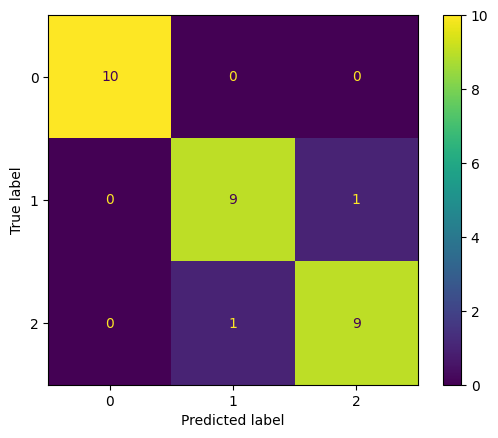

In [95]:
##### 7. Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### What Each Metric Means

#### Accuracy

$$
Accuracy = \frac{TP + TN}{Total}
$$

Accuracy measures the proportion of correct predictions out of all predictions made.

---

#### Type I Error (False Positive Rate)

$$
Type\ I = \frac{FP}{FP + TN}
$$

Type I Error occurs when the model predicts 1 (Positive) but the actual value is 0 (Negative).

---

#### Type II Error (False Negative Rate)

$$
Type\ II = \frac{FN}{FN + TP}
$$

Type II Error occurs when the model predicts 0 (Negative) but the actual value is 1 (Positive).


_________________

-----

#### When Is Accuracy Misleading?

Accuracy can be misleading when it hides important details about model performance.
Although it measures overall correctness, it does not tell the complete story.

---

##### 1. Imbalanced Datasets

If one class dominates the dataset, accuracy can appear high even when the model performs poorly.

Example:
If 95% of samples belong to class 0,
a model predicting only class 0 will achieve 95% accuracy.

However, it completely fails to detect the minority class.

In such cases, consider:
- Precision
- Recall
- F1-score
- ROC-AUC
- Confusion Matrix

---

##### 2. Unequal Cost of Errors

Accuracy assumes:

Cost(False Positive) = Cost(False Negative)

But in many real-world problems, this assumption is false.

Example:
- Medical diagnosis → Missing a disease (False Negative) can be critical.
- Fraud detection → Missing fraud may be more costly than false alarms.
- Spam detection → Marking a genuine email as spam may be unacceptable.

Accuracy does not reflect the severity or cost of different types of errors.

---

##### 3. Multiclass with Class Imbalance

In multiclass problems, if one class dominates,
accuracy may mostly reflect performance on that dominant class.

Minor classes may be predicted poorly without significantly affecting the overall accuracy.

---

##### 4. Does Not Show Error Distribution

Two models can have the same accuracy but very different confusion matrices.

Example:
Both models have 90% accuracy,
but one model makes many False Negatives,
while the other makes many False Positives.

Accuracy cannot distinguish between these behaviors.

---

##### 5. During Model Optimization

Accuracy is not differentiable.
It is based on hard class predictions (0 or 1).

Most models optimize smooth loss functions such as:
- Cross-entropy
- Log loss

Accuracy is typically used only for evaluation, not for training.

---

##### Summary

Accuracy is reliable when:
- Classes are balanced
- Error costs are similar
- Overall correctness is the main concern

Accuracy is misleading when:
- Data is imbalanced
- Error costs are unequal
- Class-wise performance matters

In such cases, always examine the confusion matrix and class-specific metrics.